In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('insurance_data.csv')
df.head()


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


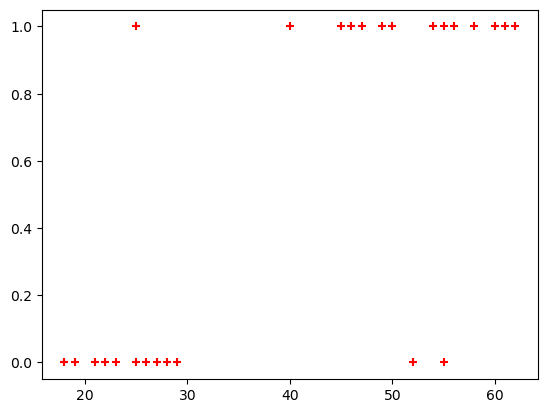

In [8]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [9]:
df.shape

(27, 2)

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test=train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [14]:
X_test

,age
13,29
15,55
20,21


In [15]:
X_train

,age
8,62
22,40
16,25
9,61
1,25
2,47
4,46
18,19
0,22
23,45


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model=LogisticRegression()

In [18]:
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
model.predict(X_test)

array([0, 1, 0], dtype=int64)

In [20]:
model.score(X_test,y_test)

1.0

In [21]:
model.predict_proba(X_test)

array([[0.7599417 , 0.2400583 ],
       [0.10989928, 0.89010072],
       [0.89572052, 0.10427948]])

In [30]:
model.predict([[38]])

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [31]:
# exercise

In [42]:
from matplotlib import pyplot as plt
%matplotlib inline


In [43]:
df1=pd.read_csv('HR_comma_sep.csv')

In [44]:
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [45]:
left=df1[df1.left==1]
left.shape

(3571, 10)

In [46]:
retained=df1[df1.left==0]
retained.shape

(11428, 10)

In [47]:
df1.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

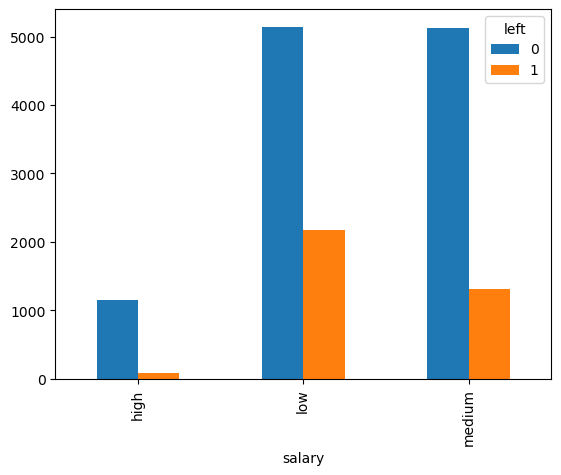

In [50]:
pd.crosstab(df1.salary,df1.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

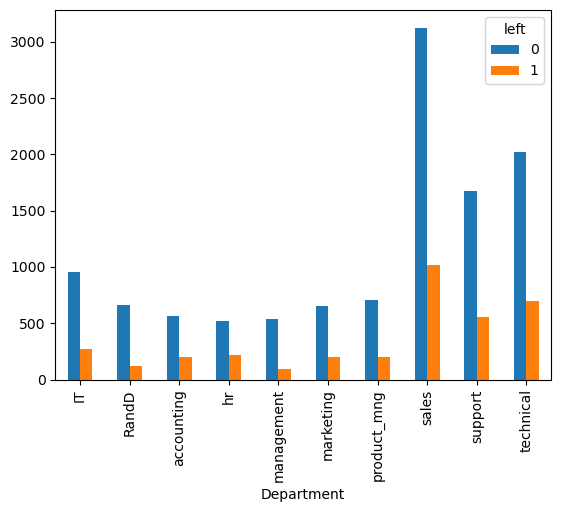

In [51]:
pd.crosstab(df1.Department,df1.left).plot(kind='bar')

In [53]:
subdf = df1[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [54]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [55]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [56]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [57]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [58]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [59]:
y = df1.left

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)


In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [63]:
model.fit(X_train, y_train)

LogisticRegression()

In [64]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:

model.score(X_test,y_test)

0.7793333333333333